In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
plt.rcParams.update({'font.size': 14})  # Make the labels larger

In [2]:
x,  z, t, C1 = symbols('x  z t C1')
f, g, y = symbols('f g y', cls=Function)

In [3]:
y(t)

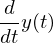

In [4]:
 y(t).diff(t)

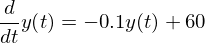

In [5]:
diffeq = Eq(y(t).diff(t), -0.1*y(t)+60)
diffeq

In [6]:
de=dsolve(diffeq, y(t))
de

### Particular solution with initial value
t0=0.; y0=200

In [7]:
solve(de.rhs.subs(t, 0)-200, C1)

In [10]:
de.subs(C1,-400.0)

In [11]:
de.subs(C1,-400.0).rhs.subs(t, 8)

## Dynamic of y(t)

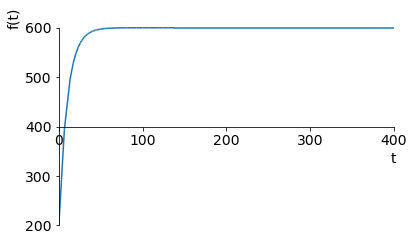

In [15]:
plot(de.subs(C1,-400.0).rhs, (t, 0, 400.))

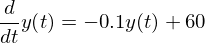

In [20]:
diffeq

## Dynamics of y'(t), phase diagram 

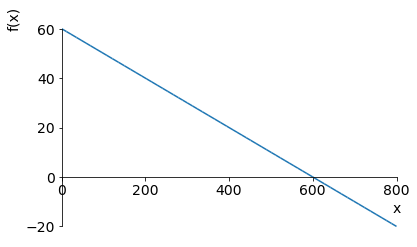

In [23]:
plot(-0.1*x+60, (x, 0, 800.))



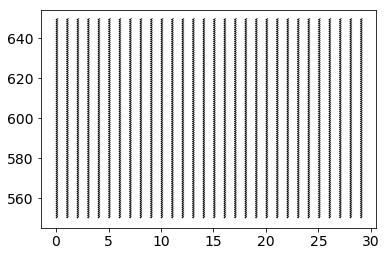

In [76]:
import sympy
#define symbolic vars, function
x,y=sympy.symbols('x y')
#fun= 600.0-400.0*exp(-0.1*x) 

#take the gradient symbolically
#gradfun=[sympy.diff(fun,var) for var in (x,y)]

gradfun= -.1*y + 60

#turn into a bivariate lambda for numpy
numgradfun=sympy.lambdify([x,y],gradfun)

X,Y=np.meshgrid(np.arange(0,30),np.arange(550,650))
graddat=numgradfun(X,Y)

plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])
plt.show()

In [61]:
gradfun

In [79]:
numgradfun(5,100)

In [80]:
graddat[1]

array([ 4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,
        4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,
        4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9,  4.9])

In [83]:
import sympy
#define symbolic vars, function
x,y=sympy.symbols('x y')
fun=3*x**2-5*y**2

#take the gradient symbolically
gradfun=[sympy.diff(fun,var) for var in (x,y)]

#turn into a bivariate lambda for numpy
numgradfun=sympy.lambdify([x,y],gradfun)

In [88]:
gradfun

In [89]:
numgradfun

<function numpy.<lambda>>

now you can use numgradfun(1,3) to compute the gradient at (x,y)==(1,3). This function can then be used for plotting.

For plotting, you can use, for instance, matplotlib's quiver, like so:


In [86]:



X,Y=np.meshgrid(np.arange(-10,11),np.arange(-10,11))
graddat=numgradfun(X,Y)



In [87]:
graddat[0],graddat[1]

(array([[-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        [-60, -54, -48, -42, -36, -30, -24, -18, -12,  -6,   0,   6,  12,
          18,  24,  30,  36,  42,  48,  54,  60],
        

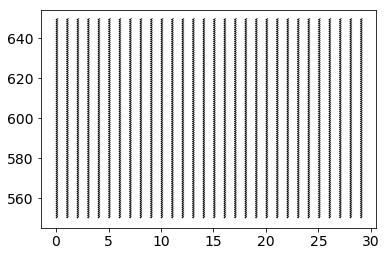

In [82]:
plt.figure()
plt.quiver(X,Y,graddat[0],graddat[1])

plt.show()

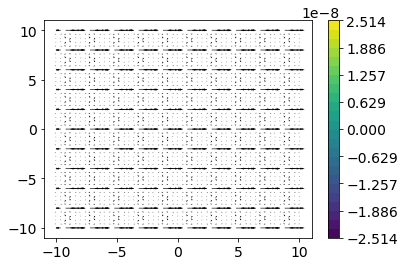

In [55]:
 


def CD(k,l):
    #return sp.sin(2*sp.pi*k/2)/((4*sp.pi**2)*(k**2+l**2))*1e-6
    return sympy.sin(2*sympy.pi*k/4)/((4*sympy.pi**2)*(k**2+l**2))*1e-6

def Vkl(x,y,k,l):
    return CD(k,l)*sympy.sin(2*sympy.pi*k*x)*sympy.cos(2*sympy.pi*l*y)

def V(x,y,kmax,lmax):
    k,l=sympy.symbols('k l',integers=True)
    return sympy.summation(Vkl(x,y,k,l),(k,1,kmax),(l,1,lmax))


#define symbolic vars, function
kmax=10
lmax=10
x,y=sympy.symbols('x y')
fun=V(x,y,kmax,lmax)

#take the gradient symbolically
gradfun=[sympy.diff(fun,var) for var in (x,y)]

#turn into bivariate lambda for numpy
numgradfun=sympy.lambdify([x,y],gradfun,'numpy')
numfun=sympy.lambdify([x,y],fun,'numpy')

#plot
X,Y=np.meshgrid(np.linspace(-10,10,51),np.linspace(-10,10,51))
graddat=numgradfun(X,Y)
fundat=numfun(X,Y)

hf=plt.figure()
hc=plt.contourf(X,Y,fundat,np.linspace(fundat.min(),fundat.max(),25))
plt.quiver(X,Y,graddat[0],graddat[1])
plt.colorbar(hc)
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Set limits and number of points in grid
y, x = np.mgrid[10:-10:100j, 10:-10:100j]

x_obstacle, y_obstacle = 0.0, 0.0
alpha_obstacle, a_obstacle, b_obstacle = 1.0, 1e3, 2e3

p = -alpha_obstacle * 
    np.exp(-((x - x_obstacle)**2 / a_obstacle +
    (y - y_obstacle)**2 / b_obstacle))


In [41]:
# For the absolute values of "dx" and "dy" to mean anything, we'll need to
# specify the "cellsize" of our grid.  For purely visual purposes, though,
# we could get away with just "dy, dx = np.gradient(p)".
dy, dx = np.gradient(p, np.diff(y[:2, 0]), np.diff(x[0, :2]))

In [39]:
np.diff(y[:2, 0])

array([-0.2020202])

In [40]:
np.diff(x[0, :2])

array([-0.2020202])

In [42]:
dy, dx

(array([[ 0.00852866,  0.00856284,  0.00859646, ...,  0.00859646,
          0.00856284,  0.00852866],
        [ 0.00844991,  0.00848378,  0.00851708, ...,  0.00851708,
          0.00848378,  0.00844991],
        [ 0.00829192,  0.00832515,  0.00835783, ...,  0.00835783,
          0.00832515,  0.00829192],
        ..., 
        [-0.00829192, -0.00832515, -0.00835783, ..., -0.00835783,
         -0.00832515, -0.00829192],
        [-0.00844991, -0.00848378, -0.00851708, ..., -0.00851708,
         -0.00848378, -0.00844991],
        [-0.00852866, -0.00856284, -0.00859646, ..., -0.00859646,
         -0.00856284, -0.00852866]]),
 array([[ 0.0170744 ,  0.01693335,  0.01664931, ..., -0.01664931,
         -0.01693335, -0.0170744 ],
        [ 0.01710858,  0.01696724,  0.01668264, ..., -0.01668264,
         -0.01696724, -0.01710858],
        [ 0.01714213,  0.01700051,  0.01671535, ..., -0.01671535,
         -0.01700051, -0.01714213],
        ..., 
        [ 0.01714213,  0.01700051,  0.01671535, ...,

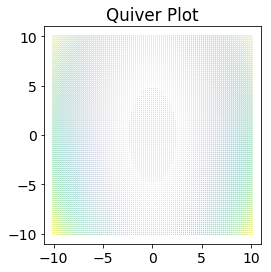

In [43]:
fig, ax = plt.subplots()
ax.quiver(x, y, dx, dy, p)
ax.set(aspect=1, title='Quiver Plot')
plt.show()

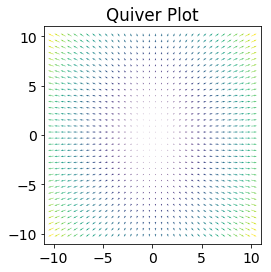

In [44]:
# Every 3rd point in each direction.
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
ax.quiver(x[skip], y[skip], dx[skip], dy[skip], p[skip])
ax.set(aspect=1, title='Quiver Plot')
plt.show()

In [45]:
slice(None, None, 3)

slice(None, None, 3)

In [37]:
#!pip install quiver



In [46]:
x[skip]

array([[ 10.        ,   9.39393939,   8.78787879, ...,  -8.78787879,
         -9.39393939, -10.        ],
       [ 10.        ,   9.39393939,   8.78787879, ...,  -8.78787879,
         -9.39393939, -10.        ],
       [ 10.        ,   9.39393939,   8.78787879, ...,  -8.78787879,
         -9.39393939, -10.        ],
       ..., 
       [ 10.        ,   9.39393939,   8.78787879, ...,  -8.78787879,
         -9.39393939, -10.        ],
       [ 10.        ,   9.39393939,   8.78787879, ...,  -8.78787879,
         -9.39393939, -10.        ],
       [ 10.        ,   9.39393939,   8.78787879, ...,  -8.78787879,
         -9.39393939, -10.        ]])